<h1 align="center">Airflow: Exemplos de preços de casas (housing)<h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Este script foi baseado no maravilhoso link:

* [Pipeline para Machine Learning com Airflow e Python](https://www.youtube.com/watch?v=V-69YH93ROY)

* [GitHub: Ozéias Godoy](https://github.com/ozeiasgodoy)

<font color="orange">Aqui vamos a treinar um modelo de preços de casas (housing in Boston) para depois usar todos os passos até o terinamento do Modelos num Pipeline com `AIRFLOW`. </font>

In [61]:
# Importando as nossas Bibliotecas

import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os

import matplotlib.pyplot as plt
#%matplotlib inline

In [62]:
# Criamos um diretório

os.makedirs('./housing', exist_ok=True)

In [63]:
# Download do zip com o csv

url = "https://github.com/ozeiasgodoy/notebooks/blob/main/dados/housing.zip?raw=true"

filebytes = BytesIO(
    requests.get(url).content
)

In [64]:
# Extração do arquivo

myzip = zipfile.ZipFile(filebytes)
myzip.extractall("./housing")

In [65]:
# Carregando o arquivo extraido para um DataFrame

housing = pd.read_csv('/home/eddygiusepe/20_airflow/Apache_Airflow_with_Python/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [66]:
housing.shape

(20640, 10)

In [67]:

# Verificando as Features do Dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
# verificanfo o resumo dos atributos numéricos
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


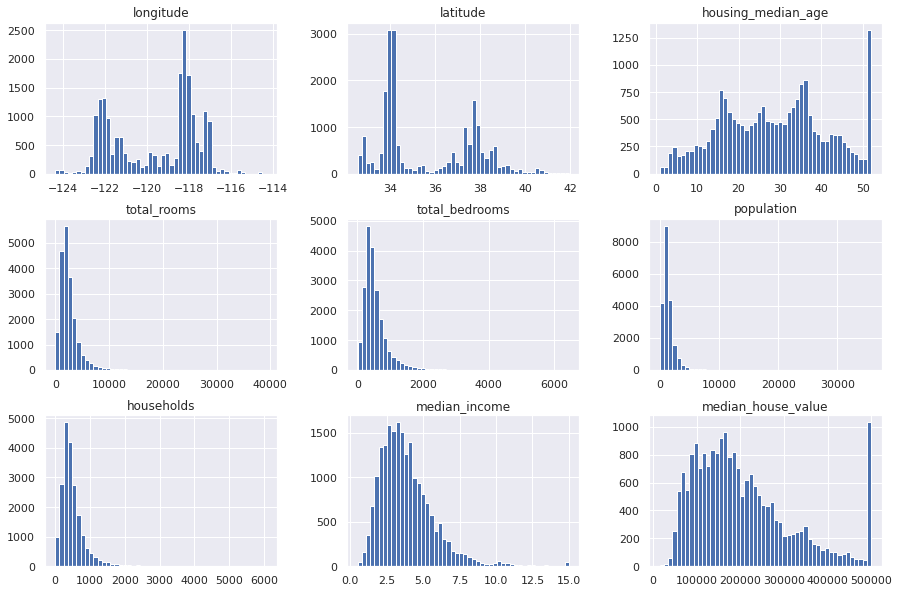

In [69]:
# Histograma dos atributos numéricos

housing.hist(bins=50, figsize=(15, 10))
plt.show()

# Explorando os Dados - EDA (Exploratory Data Analysis) 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


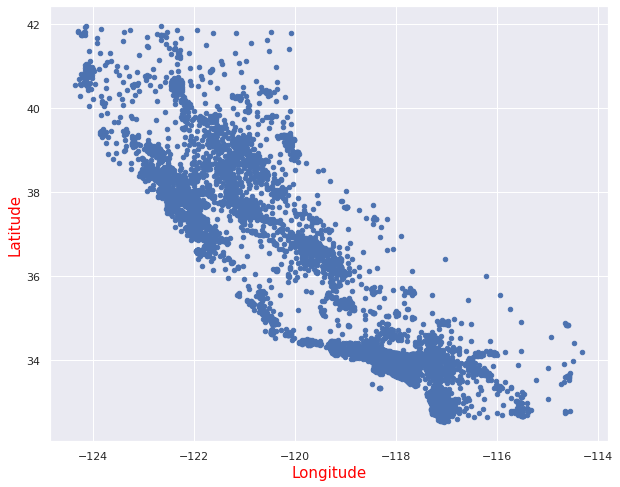

In [70]:
# Com dados de latitute e longitude (Dados geográficos), podemos criar um gráfico de dispersão para visualizar os dados de todos os bairros

housing.plot(kind="scatter", x='longitude', y='latitude', figsize=(10, 8))
plt.ylabel("Latitude", c="red", fontsize="15")
plt.xlabel("Longitude", c="red", fontsize="15")
plt.grid(True)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

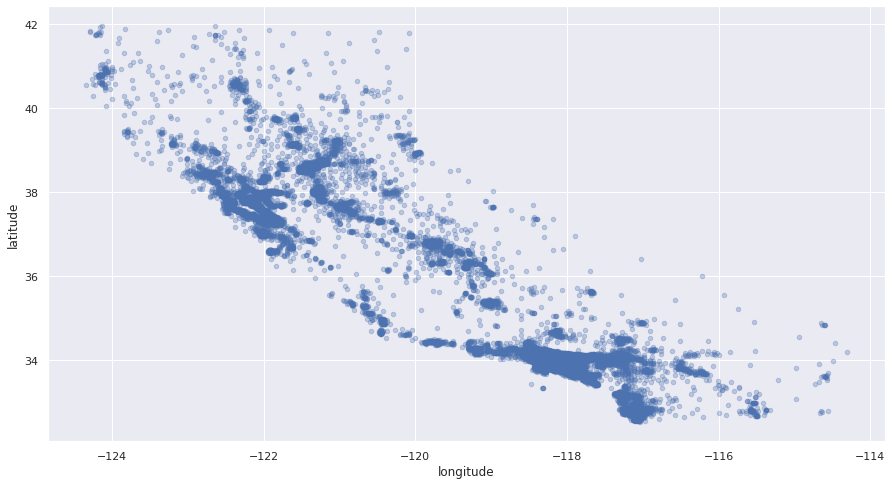

In [71]:
# Se adicionarmos o parâmetro alpha, podemos visualizar pontos com alta densidade de Dados

housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.3)

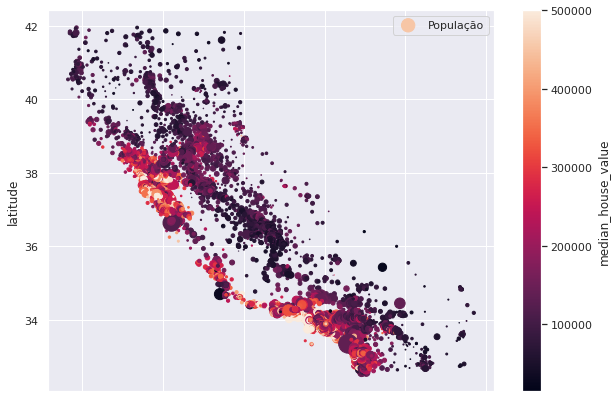

In [72]:
# Veremos agora os preços das casas
# O raio ("tamanho") de cada círculo, representa a população do bairro --> parametro s
# A cor, representa o preço --> parametro c
# Usaremos a paleta de cor rainbom, com valores mais baixo em azul e valor mais altos em vermelho: parametro cmap

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1,
             s=housing["population"]/100, label="População", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("rainbow"), colorbar=True,),
plt.legend()
plt.grid(True)
plt.show()

# Plotando as informações no mapa

In [73]:
# Download do zip com o csv
url = "https://github.com/ozeiasgodoy/notebooks/blob/main/dados/countyl010g_shp_nt00964.zip?raw=true"

filebytes = BytesIO(
    requests.get(url).content
)

# Extração do zip
myzip = zipfile.ZipFile(filebytes)
myzip.extractall("./housing")


In [74]:
# Instalando a biblioteca para trabalhar com o mapa
# Tive problemas e resolví com isto --> https://github.com/SciTools/cartopy/issues/1940

#!pip install cartopy
#!pip install geoviews 


/tmp/ipykernel_21549/3073896003.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


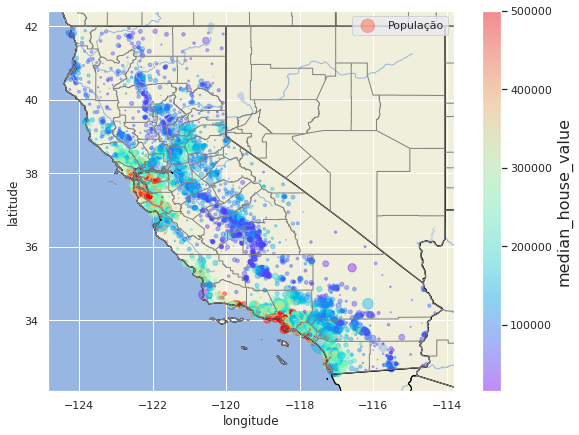

In [75]:
# Importando as bibliotecas
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
#%matplotlib inline


plt.figure(figsize=(10,7))

# Criando o mapa
ca_map = plt.axes(projection=ccrs.PlateCarree())

ca_map.add_feature(cfeature.LAND)
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle=':')
ca_map.add_feature(cfeature.LAKES, alpha=0.5)
ca_map.add_feature(cfeature.RIVERS)
ca_map.add_feature(cfeature.STATES.with_scale('10m'))

# Adicionando as linhas das cidades
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader('/home/eddygiusepe/20_airflow/Apache_Airflow_with_Python/housing/countyl010g.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())
ca_map.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

ca_map.xaxis.set_visible(True)
ca_map.yaxis.set_visible(True)

# Plotando os valores no mapa
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4, 
            s=housing["population"]/100, label="População",
            c=housing['median_house_value'], 
            cmap=plt.get_cmap("rainbow"), 
            transform=ccrs.PlateCarree())

prices = housing["median_house_value"]
cbar = plt.colorbar()
cbar.set_label('median_house_value', fontsize=16)


# Adicionando os labels de x e y
plt.ylabel("latitude", fontsize=12)
plt.xlabel("longitude", fontsize=12)
plt.legend()
plt.show()

# É possivel identificar uma relação dos poreços com a localização (proximo ao mar, por exemplo) e a densidade populacional

/tmp/ipykernel_21549/2453304266.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr(), annot=True, vmin=-1, vmax=1, linewidths=.9)


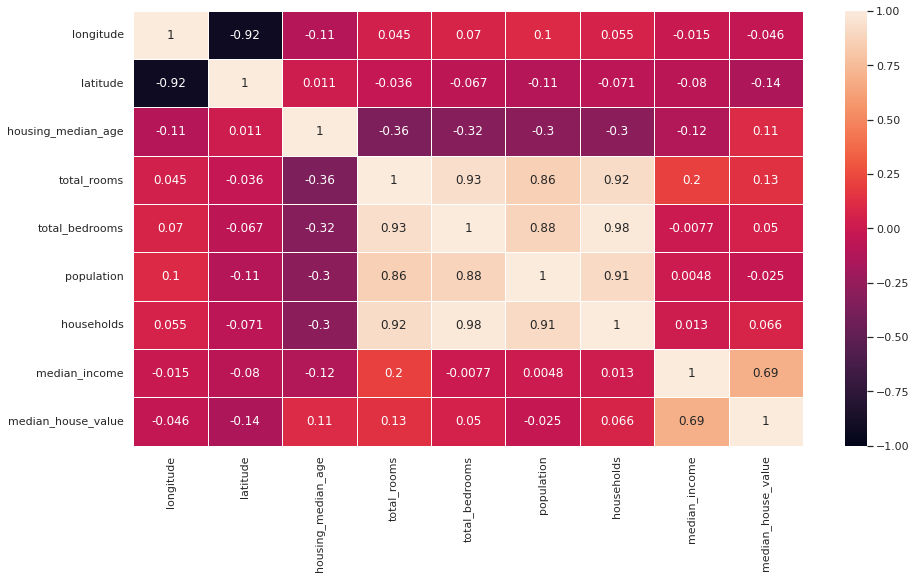

In [76]:
import seaborn as sns

sns.heatmap(housing.corr(), annot=True, vmin=-1, vmax=1, linewidths=.9)
plt.show()

In [77]:
# Uma outra forma de analisar a correlação
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [78]:
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

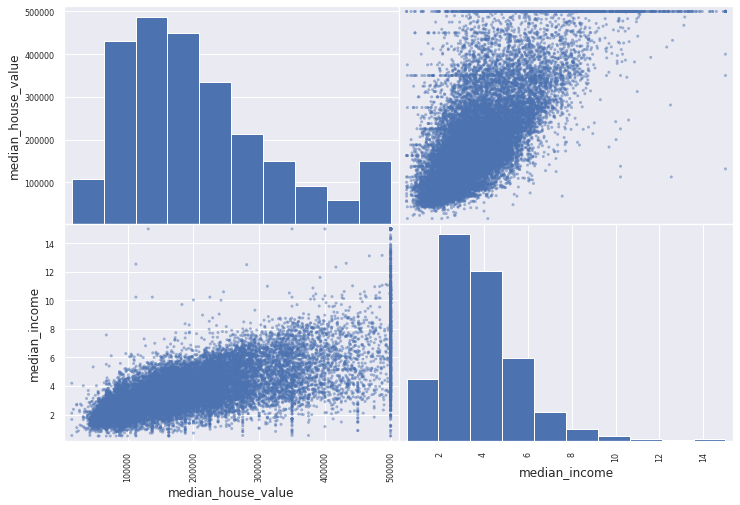

In [79]:
# Mais outra forma 
from pandas.plotting import scatter_matrix


attributes = ['median_house_value', 'median_income']
scatter_matrix(housing[attributes], figsize=(12, 8))


# Criando novos atributos

In [80]:
# Número de comodos por domicilio
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

# Número de comodos
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

# População por domicilio
housing['population_per_household'] = housing['population']/housing['households']

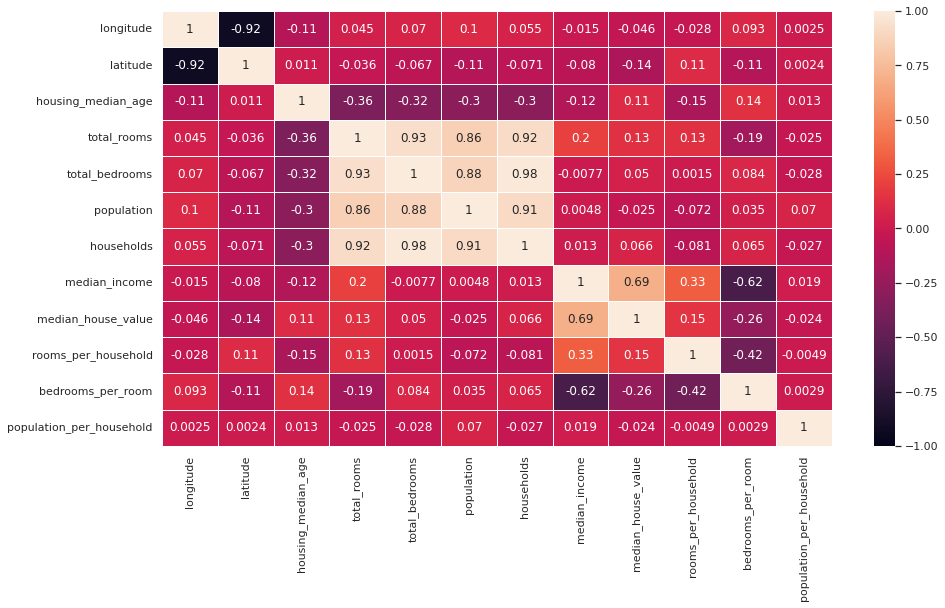

In [81]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(housing.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, linewidths=.9)
plt.show()


In [82]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# Preparação do nosso Dataset para os ALgoritmos de Machine Learning

In [83]:
# Tratando dados faltantes
housing.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [84]:
# A média 
housing['total_bedrooms'].mean()

537.8705525375618

In [85]:
# A média
housing['bedrooms_per_room'].mean()

0.21303883048085132

In [86]:
# Iremos preencher os campos nulos das colunas, com suas respectivas MÉDIAS

housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
housing['bedrooms_per_room'] =housing['bedrooms_per_room'].fillna(housing['bedrooms_per_room'].mean())

In [87]:
housing[['total_bedrooms', 'bedrooms_per_room']]

,total_bedrooms,bedrooms_per_room
0,129.0,0.146591
1,1106.0,0.155797
2,190.0,0.129516
3,235.0,0.184458
4,280.0,0.172096
...,...,...
20635,374.0,0.224625
20636,150.0,0.215208
20637,485.0,0.215173
20638,409.0,0.219892


In [88]:
# Verificamos se efetivamente foi preenchido os VALORES MISSING
housing.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [89]:
# Vamos tratar está coluna
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [90]:
# Aplicamos um "One Ho Encoding na coluna ocean_proximity"
housing  = pd.get_dummies(housing, columns=['ocean_proximity'])
#housing

In [92]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0


In [93]:
# Vamos normalizar os dados
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [94]:
# Normalizando
min_max_scaler.fit(housing)

MinMaxScaler()

In [96]:
housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',	'total_bedrooms', 'population',
         'households', 	'median_income', 'rooms_per_household','bedrooms_per_room',
         'population_per_household']] = min_max_scaler.fit_transform(
             housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms',	'total_bedrooms', 'population',
            'households', 	'median_income', 'rooms_per_household','bedrooms_per_room','population_per_household']]
         )

In [97]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,0.043512,0.051768,0.001499,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,0.038224,0.061996,0.001141,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,0.052756,0.032796,0.001698,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,0.035241,0.093843,0.001493,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,0.038534,0.080107,0.001198,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,78100.0,0.029769,0.138472,0.001503,0,1,0,0,0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,77100.0,0.037344,0.128009,0.001956,0,1,0,0,0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,92300.0,0.030904,0.127970,0.001314,0,1,0,0,0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,84700.0,0.031783,0.133214,0.001152,0,1,0,0,0


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score


y = housing["median_house_value"]

features = housing.drop(["median_house_value"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 16), (6192, 16), (14448,), (6192,))

In [100]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Modelo de LinearRegression

In [120]:
# Criamos o modelo Regressão linear
reg_linear = LinearRegression()

# treinamos o modelo
reg_linear.fit(X_train, y_train)

# Realizamos as previsões
y_pred = reg_linear.predict(X_test)

/tmp/ipykernel_21549/3602033345.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')


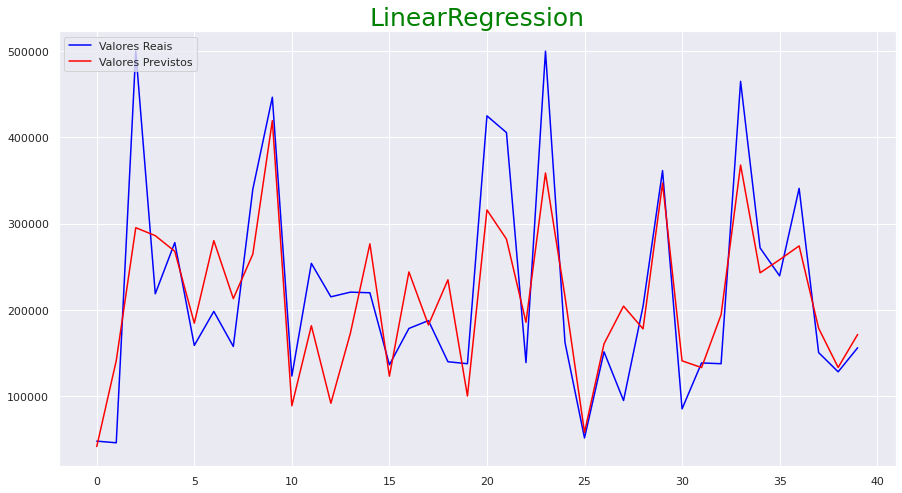

In [122]:
#IMPORTANTE!!!
# A acurracia de um modelo não é medida dessa forma

# O plot é apenas uma forma, mais didática de demonstrar as previsões
# Inclusive estamo usando somente os primiros 40 valores
plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')
plt.plot(range(len(y_pred[:40])), y_pred[:40], color='red')
plt.legend(['Valores Reais', 'Valores Previstos'], loc='upper left')
plt.title("LinearRegression", c='green', fontsize=25)
plt.grid(True)
plt.show()

## Modelo de RandomForestRegressor

In [123]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

/tmp/ipykernel_21549/2728403822.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')


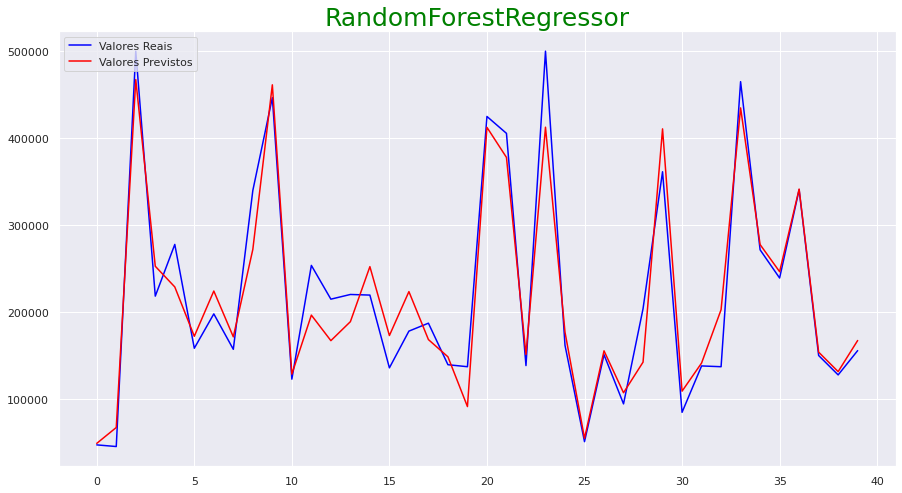

In [124]:
plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')
plt.plot(range(len(y_pred[:40])), y_pred[:40], color='red')
plt.legend(['Valores Reais', 'Valores Previstos'], loc='upper left')
plt.title("RandomForestRegressor", c='green', fontsize=25)

plt.show()

## Modelo de KNeighborsRegressor

In [125]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


/tmp/ipykernel_21549/1193393112.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')


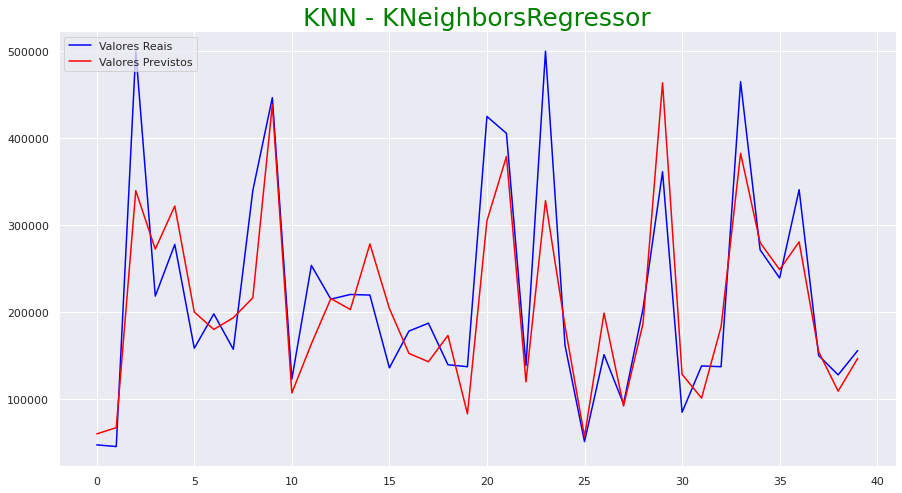

In [126]:
plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')
plt.plot(range(len(y_pred[:40])), y_pred[:40], color='red')
plt.legend(['Valores Reais', 'Valores Previstos'], loc='upper left')
plt.title("KNN - KNeighborsRegressor", c='green', fontsize=25)

plt.show()

## Modelo de DecisionTreeRegressor

In [127]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


/tmp/ipykernel_21549/2690001144.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')


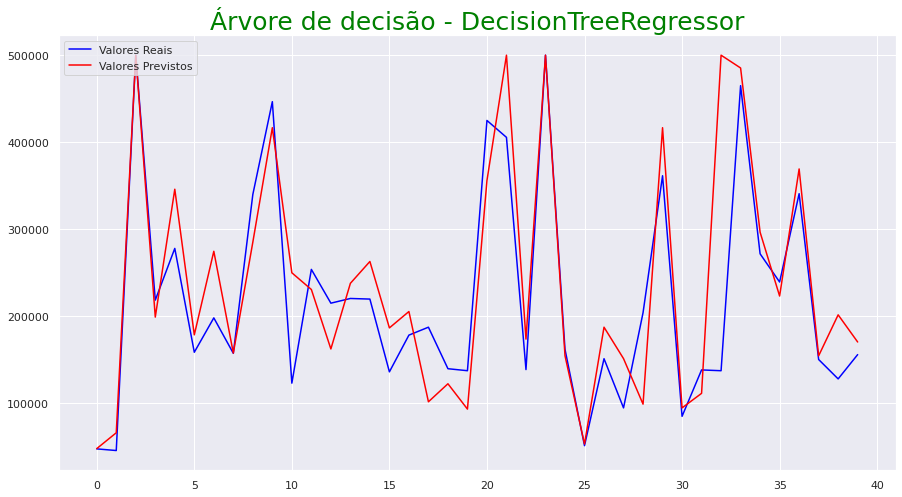

In [129]:
plt.plot(range(len(y_test[:40])), y_test[:40], color='blue')
plt.plot(range(len(y_pred[:40])), y_pred[:40], color='red')
plt.legend(['Valores Reais', 'Valores Previstos'], loc='upper left')
plt.title("Árvore de decisão - DecisionTreeRegressor", c="green", fontsize=25)

plt.show()